In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('cell_samples.csv')

In [3]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df['BareNuc'].value_counts()

BareNuc
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [6]:
df.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [7]:
df['BareNuc'] = pd.to_numeric(df['BareNuc'], errors='coerce')

In [8]:
df=df.dropna()

In [9]:
df=df.drop('ID' , axis=1)

In [19]:
df.shape

(683, 10)

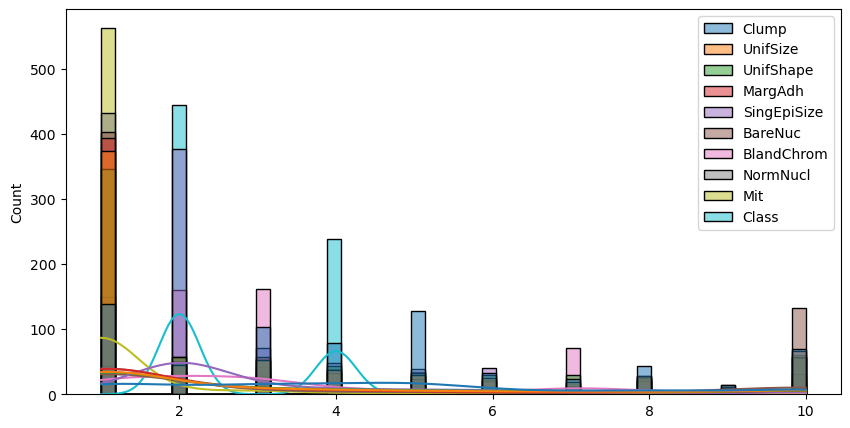

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(df,bins=50 , kde=True)
plt.show()

<Axes: >

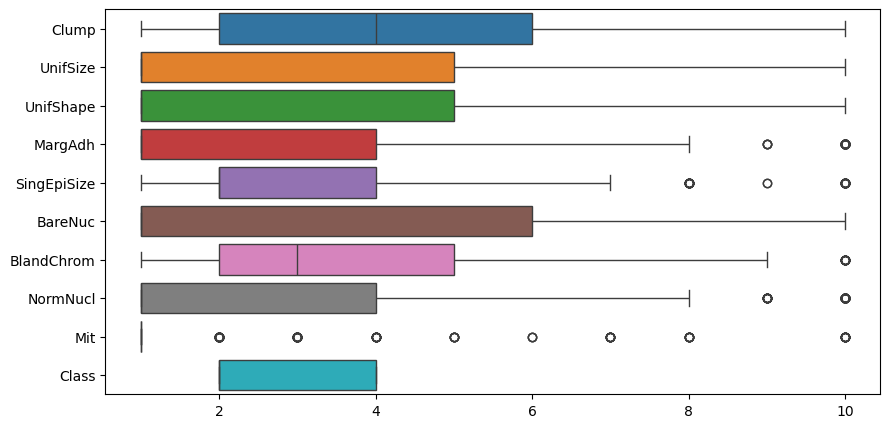

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(df,orient='h')

In [23]:
from scipy.stats import skew

In [24]:
sk=skew(df)
print(sk)

[0.58636285 1.22370903 1.15534551 1.50586459 1.69997243 0.98784006
 1.09286357 1.41730968 3.50375965 0.62930825]


In [29]:
df[['UnifSize','SingEpiSize','MargAdh','NormNucl']]=np.log1p(df[['UnifSize','SingEpiSize','MargAdh','NormNucl']])

اگر چولگی داشته باشم میشود هم مثل بالا لگاریتم بگیریم هم رادیکال بگیری هم روش زیر



from sklearn.preprocessing import PowerTransformeer


pt=PowerTransformeer(method = 'yeo-johnson')


df[['feature']] = pt.fit_transform(df[[feature]])

In [31]:
sk=skew(df)
print(sk)

[0.58636285 0.77648381 1.15534551 1.00272807 0.98777454 0.98784006
 1.09286357 1.0604954  3.50375965 0.62930825]


In [33]:
Q1=np.percentile(df['Mit'],25)
Q3=np.percentile(df['Mit'],75)
IQR=Q3 - Q1

In [49]:
lower_bound =Q1 - 1.5*IQR
upper_bound= Q3 + 1.5*IQR

In [55]:
outliers= df[(df['Mit']<lower_bound)| (df['Mit']>upper_bound)]

In [57]:
print(df.shape[0])
print(outliers.shape[0])

683
120


In [69]:
df.loc[outliers.index ,  'Mit'] = np.nan

In [71]:
df=df.dropna()

In [81]:
df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,0.693147,1,0.693147,1.098612,1.0,3,0.693147,1.0,2
1,5,1.609438,4,1.791759,2.079442,10.0,3,1.098612,1.0,2
2,3,0.693147,1,0.693147,1.098612,2.0,3,0.693147,1.0,2
3,6,2.197225,8,0.693147,1.386294,4.0,3,2.079442,1.0,2
4,4,0.693147,1,1.386294,1.098612,1.0,3,0.693147,1.0,2


In [83]:
df=df.astype(int)

In [85]:
df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,0,1,0,1,1,3,0,1,2
1,5,1,4,1,2,10,3,1,1,2
2,3,0,1,0,1,2,3,0,1,2
3,6,2,8,0,1,4,3,2,1,2
4,4,0,1,1,1,1,3,0,1,2


In [87]:
x=df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']].values

In [91]:
y=df['Class'].values

In [95]:
from sklearn.model_selection import train_test_split

In [97]:
x_train ,x_test ,y_train ,y_test = train_test_split(x,y , test_size=0.2 , random_state=4)

In [99]:
from sklearn  import svm

In [171]:
SV = svm.SVC(C=10 , kernel='rbf' ,gamma=0.001)
SV.fit(x_train , y_train)

SVC(C=10, gamma=0.001)

In [173]:
y_pred = SV.predict(x_test)

In [175]:
from sklearn.metrics import accuracy_score
acuuracy = accuracy_score(y_test,y_pred)
print(acuuracy)

0.9557522123893806


In [177]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           2       0.97      0.98      0.97        86
           4       0.92      0.89      0.91        27

    accuracy                           0.96       113
   macro avg       0.94      0.93      0.94       113
weighted avg       0.96      0.96      0.96       113



Text(50.722222222222214, 0.5, 'True Label')

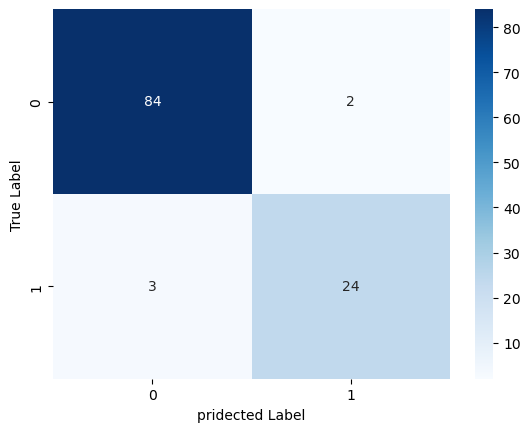

In [179]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True , cmap='Blues')
plt.xlabel('pridected Label')
plt.ylabel('True Label')

In [117]:
from sklearn.model_selection import GridSearchCV

In [119]:
param_grid = {'C':[0.01,0.1,1,10,100], 'gamma':[0.001,0.001,0.1,1,10]}
svm_model=svm.SVC(kernel='rbf')
grid=GridSearchCV(svm_model , param_grid=param_grid , cv=5, scoring='accuracy')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.001, 0.1, 1, 10]},
             scoring='accuracy')

In [123]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.001}


In [125]:
best_svm=grid.best_estimator_

In [127]:
from sklearn.feature_selection import RFE

In [137]:
x_train

array([[ 9,  1,  5, ...,  4,  2,  1],
       [ 1,  0,  1, ...,  1,  0,  1],
       [ 8,  2,  9, ..., 10,  2,  1],
       ...,
       [ 5,  0,  1, ...,  1,  0,  1],
       [ 3,  1,  2, ...,  3,  1,  1],
       [ 1,  0,  1, ...,  1,  0,  1]])

In [161]:
svm_model= svm.SVC(kernel='linear')
selectors= RFE(estimator=svm_model , n_features_to_select=5)
selectors.fit(x_train,y_train)




RFE(estimator=SVC(kernel='linear'), n_features_to_select=5)

In [167]:
feature_names= ['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']

In [169]:
selected_feature = [feature_names[i]  for i in range(len(feature_names))   if selectors.support_[i]]
print(selected_feature)

['Clump', 'UnifSize', 'MargAdh', 'BareNuc', 'NormNucl']


چون کلاس ها یکی 28واون یکی80 و تعادل برقرار نیس پس باید از کد زیر استفاده کرد




افزایش داده های کلاس



from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy = 'auto' ,random_state=42)

X_resampled ,  Y_resampled = smote.fit_resample(x_train , y_train)


.............................................................................


from imblearn.under_sampling import  RandomUndersampler

under_sample =  RandomUndersampler(sampling_strategy = 'auto' ,random_state=42))

X_resampled ,  Y_resampled =under_sample.fit_resample(x_train , y_train)